<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Coffee_%26_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (12, 6)

In [12]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/CoffeeAndCodeLT2018%20-%20CoffeeAndCodeLT2018.csv'
df = pd.read_csv(url,error_bad_lines=False)
df.head(10)

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29
5,8,2,While coding,Sometimes,Nescafe,Yes,Male,Lebanon,30 to 39
6,5,2,While coding,Yes,Nescafe,Sometimes,Male,Lebanon,NaN
7,10,4,Before coding,Sometimes,Turkish,Sometimes,Male,Lebanon,18 to 29
8,10,2,While coding,Yes,American Coffee,Sometimes,Male,Lebanon,30 to 39
9,10,2,While coding,Yes,Nescafe,No,Male,Lebanon,30 to 39


In [13]:
df.columns

Index(['CodingHours', 'CoffeeCupsPerDay', 'CoffeeTime', 'CodingWithoutCoffee',
       'CoffeeType', 'CoffeeSolveBugs', 'Gender', 'Country', 'AgeRange'],
      dtype='object')

In [14]:
r,c = df.shape
print("Number of rows =",r)
print("Number of cols =",c)

Number of rows = 100
Number of cols = 9


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CodingHours          100 non-null    int64 
 1   CoffeeCupsPerDay     100 non-null    int64 
 2   CoffeeTime           100 non-null    object
 3   CodingWithoutCoffee  100 non-null    object
 4   CoffeeType           99 non-null     object
 5   CoffeeSolveBugs      100 non-null    object
 6   Gender               100 non-null    object
 7   Country              100 non-null    object
 8   AgeRange             98 non-null     object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [17]:
print("Are there any missing values?")
df.isnull().values.any()

Are there any missing values?


True

In [18]:
df.isna().sum()

CodingHours            0
CoffeeCupsPerDay       0
CoffeeTime             0
CodingWithoutCoffee    0
CoffeeType             1
CoffeeSolveBugs        0
Gender                 0
Country                0
AgeRange               2
dtype: int64

In [19]:
df.dropna(inplace=True)

In [21]:
df.isnull().values.any()

False

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CodingHours,97.0,6.371134,2.650942,1.0,4.0,7.0,8.0,10.0
CoffeeCupsPerDay,97.0,2.876289,1.602457,1.0,2.0,3.0,4.0,8.0


### General value distribution across various attributes

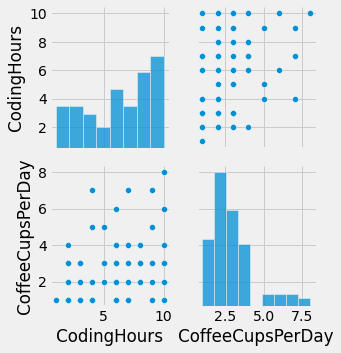

In [25]:
sns.pairplot(df)

### Gender statistics

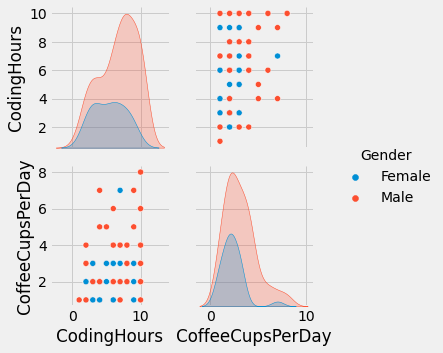

In [26]:
sns.pairplot(df, hue='Gender')

### Coding and coffee parternship time

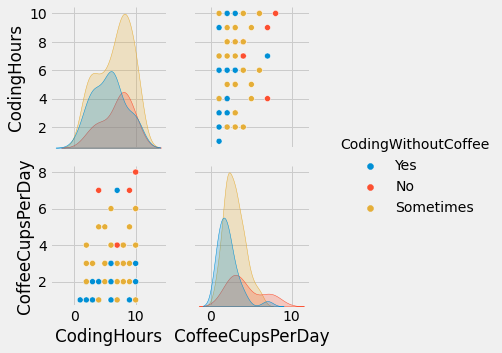

In [27]:
sns.pairplot(df, hue='CodingWithoutCoffee')

### General statistics over various parameters

In [28]:
def count_plot(variable):
    """
        input: variable example: "CoffeTime"
        output: count plot and value count
    """
    # get feature
    var = df[variable]
    
    #visualization
    plt.figure(figsize=(10,4))
    sns.countplot(x=var, palette="dark", order=var.value_counts().index)
    plt.xticks(rotation=45)
    plt.ylabel("Frequency")
    plt.title(variable)
    print("{}".format(var.value_counts()))
    plt.show()

While coding               59
Before coding              24
All the time                4
Before and while coding     4
In the morning              3
After coding                2
No specific time            1
Name: CoffeeTime, dtype: int64


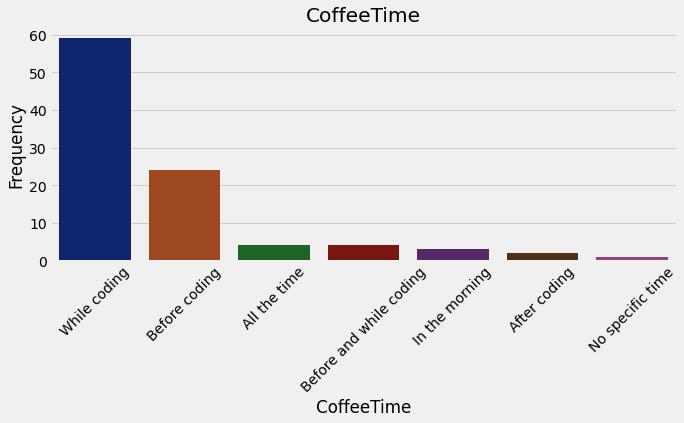

Sometimes    50
Yes          29
No           18
Name: CodingWithoutCoffee, dtype: int64


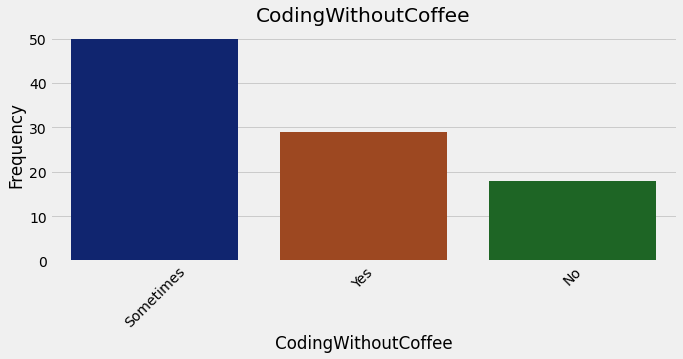

Nescafe                     30
American Coffee             23
Turkish                     19
Espresso (Short Black)       8
Cappuccino                   7
Caffè latte                  5
Double Espresso (Doppio)     3
Americano                    2
Name: CoffeeType, dtype: int64


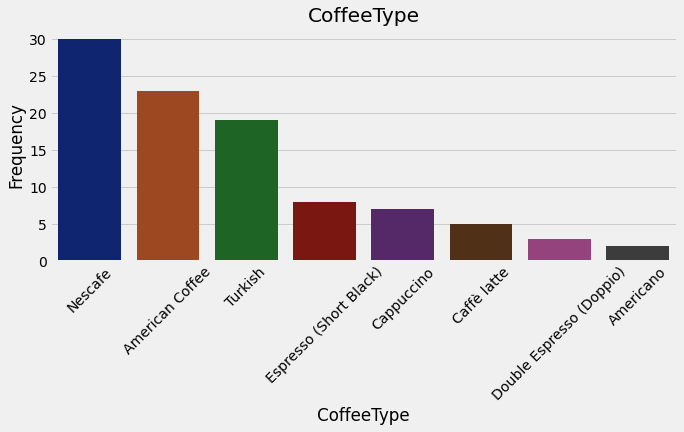

Sometimes    42
Yes          29
No           26
Name: CoffeeSolveBugs, dtype: int64


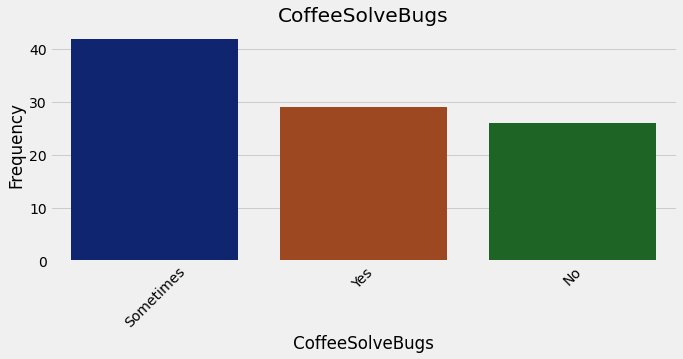

Male      71
Female    26
Name: Gender, dtype: int64


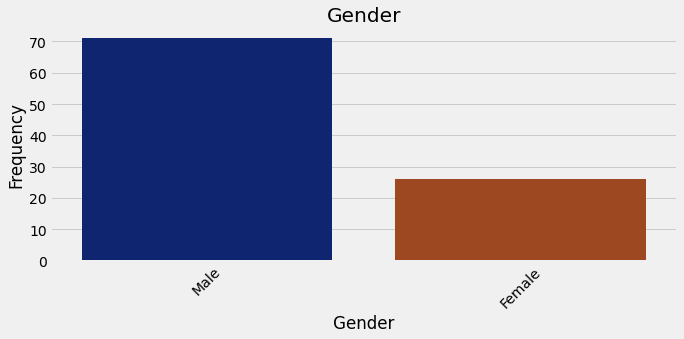

Lebanon    97
Name: Country, dtype: int64


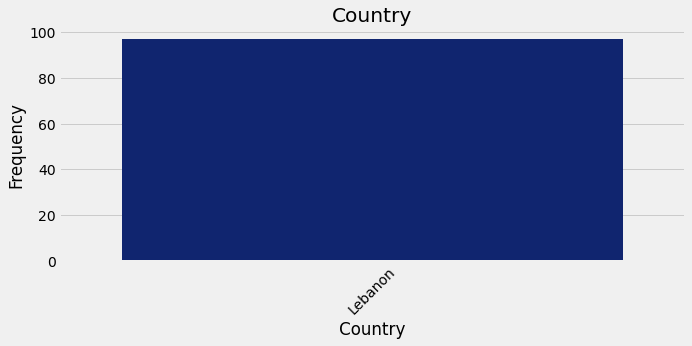

18 to 29    59
30 to 39    29
40 to 49     6
Under 18     2
50 to 59     1
Name: AgeRange, dtype: int64


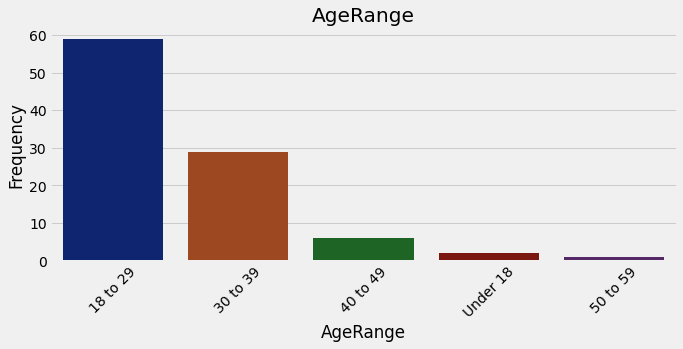

In [29]:
categorical = ["CoffeeTime", "CodingWithoutCoffee", "CoffeeType", "CoffeeSolveBugs", "Gender", "Country", "AgeRange"]
for i in categorical:
    count_plot(i)

In [30]:
df[["Gender","CoffeeCupsPerDay"]].groupby(["Gender"]).mean().sort_values(by="CoffeeCupsPerDay", ascending=False)

,CoffeeCupsPerDay
Gender,
Male,3.098592
Female,2.269231


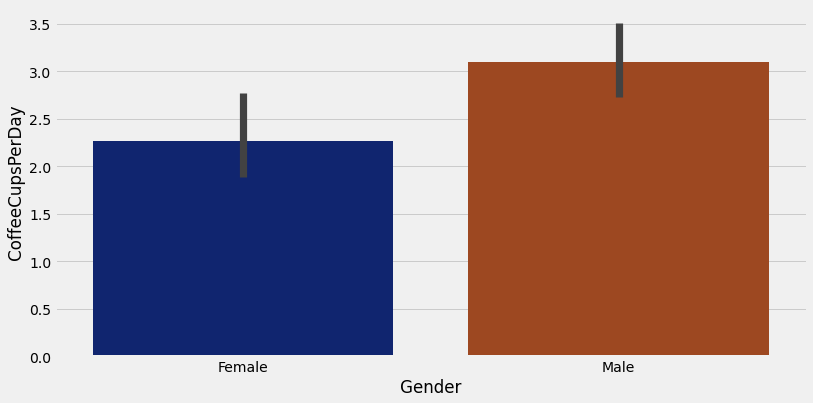

In [31]:
sns.barplot(x="Gender", y="CoffeeCupsPerDay", data=df, palette="dark")

### Thus, it is concluded that on an average, male coders drink more coffee than female coders in a day